![](http://)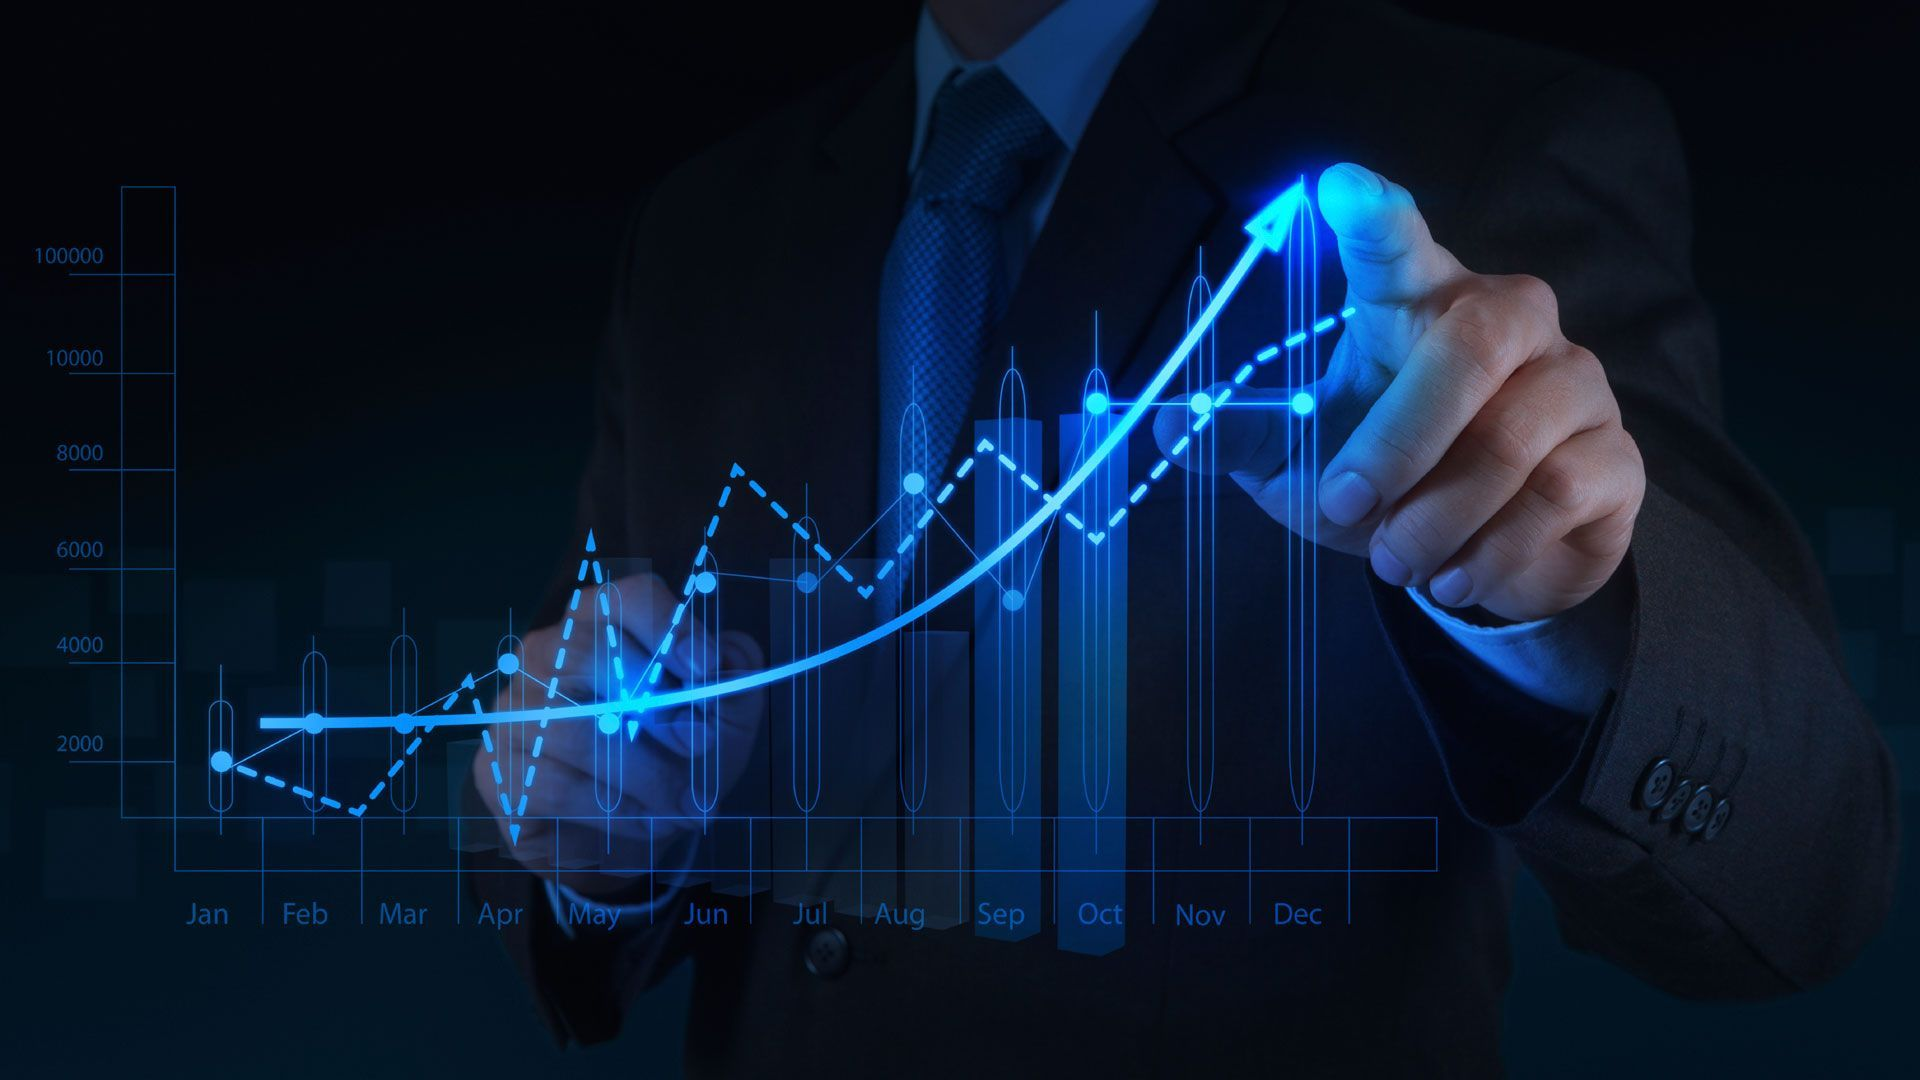

# **IMPORTING LIBRARIES**

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [88]:
data = pd.read_csv("/kaggle/input/financial-sentiment-analysis/data.csv")

In [89]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


**LABEL ENCODER STR TO INT**

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["Sentiment"] = le.fit_transform(data["Sentiment"])

# **TOKENIZATION**

In [91]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(data['Sentence'].values)



**MAX WORDS**

In [92]:
max_words = len(tokenizer.word_index)

print(max_words)

11544


**MAX LENGTH**

In [93]:
max_len = max([len(x.split()) for x in data["Sentence"]])
max_len

81

In [94]:
seq =tokenizer.texts_to_sequences(data["Sentence"])

# **PADDING**

In [95]:
pad_sequences(tokenizer.texts_to_sequences(data["Sentence"]),maxlen=max_len)

array([[   0,    0,    0, ..., 3967,  583,  475],
       [   0,    0,    0, ...,    7,  216, 3969],
       [   0,    0,    0, ...,   68,    3, 3131],
       ...,
       [   0,    0,    0, ...,  390,   94, 1242],
       [   0,    0,    0, ..., 3211,   40,   16],
       [   0,    0,    0, ...,    6,    1,  254]], dtype=int32)

In [96]:
x = pad_sequences(tokenizer.texts_to_sequences(data["Sentence"]),maxlen=max_len)
y = data["Sentiment"]

In [97]:
x.shape

(5842, 81)

In [98]:
y.shape

(5842,)

# **ONE HOT ENCODING**

In [99]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y ,num_classes = 82)

In [100]:
y.shape

(5842, 82)

# **TRAIN TEST SPLIT**

In [101]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

**SHAPES**

In [102]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((4673, 81), (1169, 81), (4673, 82), (1169, 82))

# **BUILDING MODEL**

**EARLY STOPPING**

In [103]:
callback = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

**LAYERS**

In [104]:
model = Sequential()

model.add(Embedding(max_words+1,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5))
model.add(Dense(82, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [105]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [106]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# **TRAINING MODEL**

In [107]:
history = model.fit(x_train, y_train, batch_size=25, epochs=15 ,callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.2944 - loss: 2.5354 - val_accuracy: 0.5441 - val_loss: 0.9855
Epoch 2/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5228 - loss: 0.9992 - val_accuracy: 0.5911 - val_loss: 0.8964
Epoch 3/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6609 - loss: 0.8498 - val_accuracy: 0.6518 - val_loss: 0.8437
Epoch 4/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.7069 - loss: 0.7216 - val_accuracy: 0.6595 - val_loss: 0.8356
Epoch 5/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7410 - loss: 0.6617 - val_accuracy: 0.6715 - val_loss: 0.8726
Epoch 6/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7646 - loss: 0.5845 - val_accuracy: 0.6903 - val_loss: 0.9159
Epoch 7/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8135 - loss: 0.4745 - val_accuracy: 0.6869 - val_loss: 0.9457
Epoch 8/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8251 - loss: 0.4137 - 

# **EVALUATION**

In [108]:
import numpy as np
new_sentences = ["RoA of banks to moderate to 1.1-1.2% this fiscal, on higher cost of deposits, says Crisil report"]
seq = tokenizer.texts_to_sequences(new_sentences)
padded = pad_sequences(seq, maxlen=max_len)
predictions = model.predict(padded)

# Convert the predictions to sentiment labels
sentiment_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# Print the predicted sentiment for each sentence
for sentence, sentiment in zip(new_sentences, sentiment_labels):
  print(f"Sentence: {sentence}, Predicted Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Sentence: RoA of banks to moderate to 1.1-1.2% this fiscal, on higher cost of deposits, says Crisil report, Predicted Sentiment: positive


# **EVALUATION USING LOOP**

In [112]:
#for loop for entering new inputs

#Remove below comments before execution
'''
import numpy as np
while True:
  new_sentence = input("Enter a new sentence to predict its sentiment: ")
  if new_sentence == "":
    break
  seq = tokenizer.texts_to_sequences([new_sentence])
  padded = pad_sequences(seq, maxlen=max_len)
  predictions = model.predict(padded)
  sentiment_label = le.inverse_transform(np.argmax(predictions, axis=1))[0]
  print(f"Sentence: {new_sentence}, Predicted Sentiment: {sentiment_label}")

print("Exiting sentiment prediction loop.")'''



'\nimport numpy as np\nwhile True:\n  new_sentence = input("Enter a new sentence to predict its sentiment: ")\n  if new_sentence == "":\n    break\n  seq = tokenizer.texts_to_sequences([new_sentence])\n  padded = pad_sequences(seq, maxlen=max_len)\n  predictions = model.predict(padded)\n  sentiment_label = le.inverse_transform(np.argmax(predictions, axis=1))[0]\n  print(f"Sentence: {new_sentence}, Predicted Sentiment: {sentiment_label}")\n\nprint("Exiting sentiment prediction loop.")'